In [2]:
import os, sys

# third party imports
import numpy as np
import keras.layers

Using TensorFlow backend.


In [4]:
# local imports.
sys.path.append('/kaggle/input/voxelmorph/voxelmorph/ext/pynd-lib/')
sys.path.append('/kaggle/input/voxelmorph/voxelmorph/ext/pytools-lib/')
sys.path.append('/kaggle/input/voxelmorph/voxelmorph/ext/neuron/')
sys.path.append('/kaggle/input/voxelmorph/voxelmorph/')
import voxelmorph as vxm
import neuron


The `neuron` library has been renamed to `neurite` to avoid pypi conflicts.
neuron imports will be depricated. Please switch to importing neurite.
INFO: neuron was imported from <ipython-input-4-c567cf066358> on line 7.


In [5]:
# import
# You should most often have this import together with all other imports at the top, 
# but we include here here explicitly to show where data comes from
from keras.datasets import mnist

In [8]:
# load the data. 
# `mnist.load_data()` already splits our data into train and test.  
(x_train_load, y_train_load), (x_test_load, y_test_load) = mnist.load_data()

# unfortunately the above seems to fail on the keras kernel
# so we will load it from a pre-downloaded mnist numpy file
# mnist_file = '/kaggle/input/learn2reg-mnist/mnist.npz'
# x_train_load = np.load(mnist_file)['x_train']
# y_train_load = np.load(mnist_file)['y_train']
# x_test_load = np.load(mnist_file)['x_test']
# y_test_load = np.load(mnist_file)['y_test']

# extract only instances of the digit 5
x_train = x_train_load[y_train_load==5, ...]
y_train = y_train_load[y_train_load==5]
x_test = x_test_load[y_test_load==5, ...]
y_test = y_test_load[y_test_load==5]

# let's get some shapes to understand what we loaded.
print('shape of x_train: ', x_train.shape)
print('shape of y_train: ', y_train.shape)

11493376/11490434 [==============================] - ETA: 59 - ETA: 24 - ETA: 19 - ETA: 19 - ETA: 12 - ETA: 11 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA: 10 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 -

In [9]:
nb_val = 1000 # keep 10,000 subjects for validation
x_val = x_train[-nb_val:, ...]  # this indexing means "the last nb_val entries" of the zeroth axis
y_val = y_train[-nb_val:]
x_train = x_train[:-nb_val, ...]
y_train = y_train[:-nb_val]

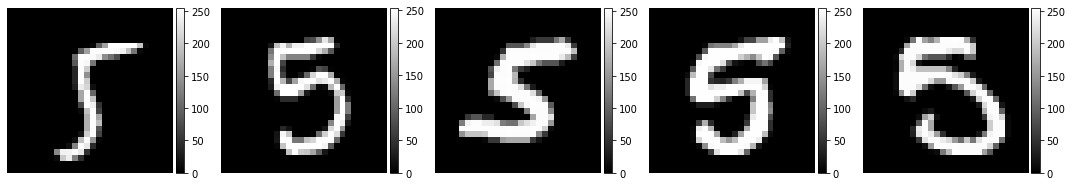

In [10]:
nb_vis = 5

# choose nb_vis sample indexes
idx = np.random.choice(x_train.shape[0], nb_vis, replace=False)
example_digits = [f for f in x_train[idx, ...]]

# plot
neuron.plot.slices(example_digits, cmaps=['gray'], do_colorbars=True);

In [11]:
# fix data
x_train = x_train.astype('float')/255
x_val = x_val.astype('float')/255
x_test = x_test.astype('float')/255

# verify
print('training maximum value', x_train.max())

training maximum value 1.0


In [12]:
pad_amount = ((0, 0), (2,2), (2,2))

# fix data
x_train = np.pad(x_train, pad_amount, 'constant')
x_val = np.pad(x_val, pad_amount, 'constant')
x_test = np.pad(x_test, pad_amount, 'constant')

# verify
print('shape of training data', x_train.shape)

shape of training data (4421, 32, 32)


In [13]:
ndims = 2
vol_shape = x_train.shape[1:]
nb_enc_features = [32, 32, 32, 32]
nb_dec_features = [32, 32, 32, 32, 32, 16]

In [16]:
# first, let's get a unet (before the final layer)
unet = vxm.networks.Unet(vol_shape, nb_enc_features, nb_dec_features);

AttributeError: 'list' object has no attribute 'outputs'

In [15]:
# inputs
print('numer of inputs', len(unet.inputs))
moving_input_tensor = unet.inputs[0]
fixed_input_tensor = unet.inputs[1]
    
# output
print('output:', unet.output)

NameError: name 'unet' is not defined